<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">MLG Poisson (Casos de muerte a causa del cancer de pulmón) INTERPRETACIÓN</h2>

### Oscar Julian Layton

se muestra un conjunto de datos paertenecientes al número de casos de cáncer de pulmón en **Fredericia, Horsens, Kolding** y **Vejle**  que hacen referencia a ciudades danesas entre 1968 y 1971. Es un marco de datos con 24 observaciones y se caracterizapor las siguientes variables:

* **Cases**: la variable hace referencia a la cantidad de casos de cáncer de pulmón.
* **Age**: Intervalos de edades (rangos de edades).
* **Pop**: Es la población de cada grupo de edad en cada ciudad.
* **City**: Es un factor con niveles Fredericia, Horsens, Kolding y Vejle.

Aquí la variable de respuesta es Poisson, sin embargo puede ser descrita por medio de una binomial mas aún por ser n grande y $\pi$ pequeño tiende a una **Poisson**. 

In [28]:
library(GLMsData)                        #Se hace necesario descargar la libreria en consideración.
data(danishlc)                           #Data set
head(danishlc,n=10)

Cases,Pop,Age,City
11,3059,40-54,Fredericia
11,800,55-59,Fredericia
11,710,60-64,Fredericia
10,581,65-69,Fredericia
11,509,70-74,Fredericia
10,605,>74,Fredericia
13,2879,40-54,Horsens
6,1083,55-59,Horsens
15,923,60-64,Horsens
10,834,65-69,Horsens


* **Interpretación 1**

Para el rango de 40-54 se tiene: 

$$\frac{11}{3059}=0.0035$$

donde la probabilidad es pequeña y el n es grande. Convirtiéndose en un Poisson. En consecuencia se multiplica por una constante **C** que gneralmente es un múltiplo de 10.

$$ C\frac{11}{3059}=C*0.0035$$

$$ 10000\frac{11}{3059}=35$$

Lo anterior se traduce a: **En Fredericia en el rango de 40-54 años hay 35 casos de cancer de pulmón por cada 10000 personas.**


* **Interpretación 2**

Para el rango >74 años se tiene: 

$$ C\frac{10}{605}= C *0.0165$$

$$ 10000\frac{11}{3059}=165$$

Lo anterior se traduce a: **En Fredericia en el rango de >74 años hay 165 casos de cancer de pulmón por cada 10000 personas.**


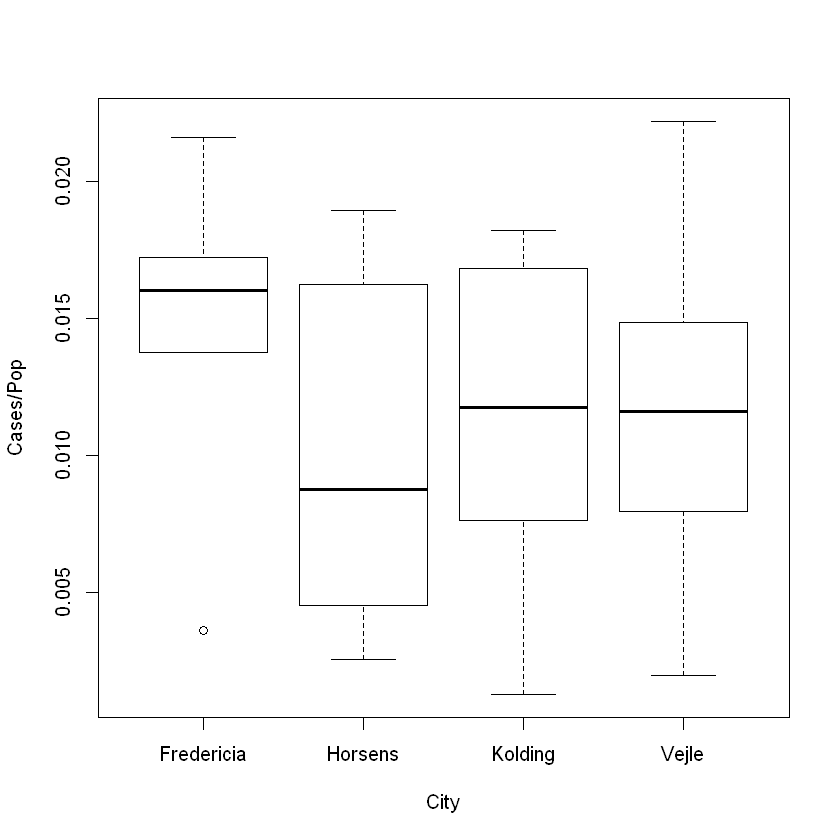

In [29]:
plot(Cases/Pop ~ City, data=danishlc)

En la anterior gráfica se logra observar cuatro boxplot que hacen referencia al conteo de casos de cancer de pulmón en cada una de las ciudades, cabe destacar que las poblaciones varian lo cual se logra identificar en la magnitud de las cajas.

No obstante la primera pregunta que surge es si ¿la cantidad de casos de cancer de pulmón es mayor de una ciudad que en la otra?, es incorrecto contrastar solamente el número de casos sin tener en cuenta la cantidad de población. por ejemplo es incorrecto decir que en Fredericia se han presentado muchos casos para la edad de 40-54 y menor cantidad para 65-69, esto se debe a que no se está comparando correctamente con respecto a la cantidad poblacional por rango de edad.  

## Modelo

En lo que concierne al modelo lineal generalizado _se quiere investigar la incidencia en casos de cancer de pulmón por grupos de edad_ y también _Por ciudad_  ¿Es mayor la incidencia a medida que aumenta el rango de edad? ¿Hay mayor incidencia en una ciudad que en otra? ¿Hay interacción?

$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
		 Y_k \sim Poisson(\mu_k), \\
		 log(C*\frac{\mu_k}{Pobl_k})= \beta_1 + \beta_2 Edad_{k} +  \beta_3 Ciudad_{k} \\
		 Y_1, Y_2,...,Y_n ind
	       \end{array}
	     \right.
   \end{equation*}
   $$
   
Donde: $\mu_k$ es el número esperado de casos de cáncer que depende del grupo de edad. pero para que sea comparable multiplico por una constante **C** (numero esperado de casos de cáncer por cada C personas expuestas)

La función de enlace a usar será **log.** donde:

$$log(C*\frac{\mu_k}{Pobl_k})= \beta_1 + \beta_2 Edad_{k} +  \beta_3 Ciudada_{k}$$

Aplicando logaritmo se tiene:

$$log(\mu_k)= [\beta_1 - log(c)] + \beta_2 Edad_{k} +  \beta_3 Ciudad_{k} + log(Pobl_k)$$

$$log(\mu_k)= \beta_1^{*}  + \beta_2 Edad_{k} +  \beta_3 Ciudad_{k} + log(Pobl_k)$$

Aqui:

$\beta_1^{*}=\beta_1 - log(c) \;\;\;\; \;\;\;\;$y $\;\;\;\;\;\;\;\; log(Pobl_k)= \beta_4 log(Pobl_k)\;\;$ con $\;\;\beta_4=1$

##### OFFSET

En lo que corresponde a $log(\mu_k)= \beta_1^{*}  + \beta_2 Edad_{k} +  \beta_3 Ciudad_{k} + log(Pobl_k)$ se tiene que al realizar el modelo en R, se estimará un $\beta$ para $log(Pobl_k)$, sin embargo este ya tiene parámetro y es uno. Luego:

$$OFFSET=log(Pobl_k)$$


###  MODELO

Puede considerarse como categoria de base la edad de 40-54, no obstante se tendían 5 betas (5 dummies) para describir la edad. supongamos que $\beta_2$  hace referencia a la dummie del rango de 55-59 

In [49]:
danishlc$Age <- relevel(danishlc$Age ,ref="40-54")              #Estableciendo como categoria de base el rango de edad de 40-54.
fit1<-glm(Cases ~  Age + City + offset(log(Pop)), data=danishlc) #offset(log(Pop) indica que beta es conocido no se debe estimar
summary(fit1)


Call:
glm(formula = Cases ~ Age + City + offset(log(Pop)), data = danishlc)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.1261  -1.8336  -0.0374   1.3568   5.1305  

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)     -0.4893     2.0339  -0.241   0.8131  
Age>74           0.9724     2.3485   0.414   0.6847  
Age55-59         0.8673     2.3485   0.369   0.7171  
Age60-64         3.7384     2.3485   1.592   0.1323  
Age65-69         4.4459     2.3485   1.893   0.0778 .
Age70-74         3.4048     2.3485   1.450   0.1677  
CityFredericia   2.2048     1.9175   1.150   0.2682  
CityHorsens      0.9811     1.9175   0.512   0.6164  
CityKolding     -0.1043     1.9175  -0.054   0.9573  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 11.0308)

    Null deviance: 254.13  on 23  degrees of freedom
Residual deviance: 165.46  on 15  degrees of freedom
AIC: 134.45

Num

 ## Interpretación
 
$$log(\mu_k)= \beta_1^{*}  + \beta_2 Edad(55-59)_{k} + \beta_3 Edad(60-64)_{k}+ \beta_4 Edad(65-69)_{k}+ \beta_5 Edad(70-74)_{k}+  \beta_6 Ciudad1_{k}+\beta_7 Ciudad2+\beta_8 Ciudad3 + log(Pobl_k)$$
 

Se describe el número esperado de muertes a causa de cancer de pulmon como:

$$\mu_k=  Exp[ \beta_1^{*}  + \beta_2 Edad(55-59)_{k} + \beta_3 Edad(60-64)_{k}+ \beta_4 Edad(65-69)_{k}+ \beta_5 Edad(70-74)_{k}+  \beta_6 Ciudad1_{k}+\beta_7 Ciudad2+\beta_8 Ciudad3 + log(Pobl_k)]$$
 
Considerando que se desea comparar a dos personas que pertenecen a la misma ciudad, uno de ellos en elrango de edad de 55-59 y el otro 40-54 (base) se tiene:
  
 $$\mu_k= \frac{ exp[ \beta_1^{*}  + \beta_2 Edad(55-59)_{k} + \beta_3 Edad(60-64)_{k}+ .......]}{exp[  \beta_1^{*}  + \beta_2 Edad(55-59)_{k} + \beta_3 Edad(60-64)_{k}+ ......] } = exp(\beta_2) $$
 
Al suponer que $\hat{\beta}_2=0.19$, se tiene:

  $$exp(\hat{\beta}_2) = exp( 0.19)=1.21$$
 
* **Interpretación entre dos rangos de edad:** dejando constante las ciudades se tiene que dados dos individuos uno de 55-59 años y otro de 40-54 :  El número esperado de muertes por cada **C** habitantes (personas expuestas) en el rango de 55-59 es aproximadamente mayor $21\%$ que los que pertenecencen al rango de 55-59 (rango base).


In [45]:
fit2<-glm(Cases ~  Age + offset(log(Pop)), data=danishlc) #offset(log(Pop) indica que beta es conocido no se debe estimar
summary(fit2)


Call:
glm(formula = Cases ~ Age + offset(log(Pop)), data = danishlc)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.9154  -1.5838  -0.4813   2.4292   4.7537  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.2811     1.6082   0.175   0.8632  
Age>74        0.9724     2.2744   0.428   0.6740  
Age55-59      0.8673     2.2744   0.381   0.7074  
Age60-64      3.7384     2.2744   1.644   0.1176  
Age65-69      4.4459     2.2744   1.955   0.0663 .
Age70-74      3.4048     2.2744   1.497   0.1517  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 10.34586)

    Null deviance: 254.13  on 23  degrees of freedom
Residual deviance: 186.23  on 18  degrees of freedom
AIC: 131.28

Number of Fisher Scoring iterations: 2


In [48]:
#ESTAS LINEAS ES PARA LLAMAR LAS FUNCIONES REALIZADAS POR EL DOCENTE hernando vanegas
setwd("") #busca por default en una carpeta en especifica todo.
source("macros.txt")#Lllamar el archivo de macros que está en la carpeta especifica,(son una fuciines especificas del profesor)


anova_glm(fit1,fit2)


 F test 

 Model 1:  Cases ~ Age + City + offset(log(Pop)) 
 Model 2:  Cases ~ Age + offset(log(Pop)) 

     F    Df1 Df2 Pr(>F)
  0.62744   3  15 0.6084


Según la prueba los betas de la variable ciudad son simultaneamente iguales a cero.